## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.3):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.3, 0.5, 0.8]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for DE in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=DE)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(DE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 11s 229us/step - loss: 1.4720 - acc: 0.4712 - val_loss: 1.4612 - val_acc: 0.4871
Epoch 50/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.4699 - acc: 0.4717 - val_loss: 1.4393 - val_acc: 0.4912
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
______

50000/50000 [==============================] - 11s 227us/step - loss: 1.5669 - acc: 0.4357 - val_loss: 1.4865 - val_acc: 0.4768s: 1.5666 - acc: 0.43
Epoch 48/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.5738 - acc: 0.4328 - val_loss: 1.5161 - val_acc: 0.4685
Epoch 49/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.5660 - acc: 0.4376 - val_loss: 1.5229 - val_acc: 0.4706
Epoch 50/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.5618 - acc: 0.4394 - val_loss: 1.4953 - val_acc: 0.4739
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_7 (Dropout)          (None,

50000/50000 [==============================] - 11s 225us/step - loss: 1.9493 - acc: 0.2717 - val_loss: 2.0084 - val_acc: 0.2766
Epoch 46/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.9481 - acc: 0.2710 - val_loss: 1.9996 - val_acc: 0.2754
Epoch 47/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.9508 - acc: 0.2685 - val_loss: 1.9527 - val_acc: 0.2991
Epoch 48/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.9483 - acc: 0.2678 - val_loss: 1.9520 - val_acc: 0.2841
Epoch 49/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.9479 - acc: 0.2693 - val_loss: 1.9808 - val_acc: 0.2854
Epoch 50/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.9408 - acc: 0.2737 - val_loss: 2.0457 - val_acc: 0.2511
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)

50000/50000 [==============================] - 11s 223us/step - loss: 2.3027 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.3026 - acc: 0.0991 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.3027 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 9s 187us/step - loss: 2.3027 - acc: 0.0990 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 10s 195us/step - loss: 2.3027 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 11s 218us/step - loss: 2.3027 - acc: 0.0962 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 12s 231us/step - loss: 2.3026 - acc: 0.0978 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 50/50
50000/50000 [========

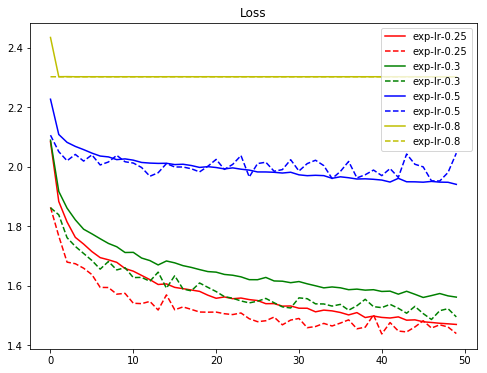

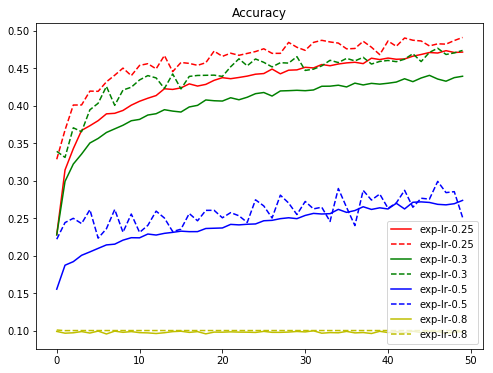

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()